# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
#Grab list of cities based on coordinates from citipy
cities_list = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        city_dict = {}
        city_dict['city'] = city.city_name
        city_dict['country'] = city.country_code
        city_dict['lat'] = x
        city_dict['long'] = y
        if len(cities_list) == 0:
            cities_list.append(city_dict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in cities_list:
                if city['city'] == city_dict['city']:
                    dup = 'yes'
        if dup == 'no':
            cities_list.append(city_dict)
            count+=1
        else:
            dup = 'no'

print(len(cities_list))

7957


In [3]:
print(cities_list[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [63]:
#Create dataframe. Grab 500 random cities
city_pd = pd.DataFrame({
    'city': [x['city'] for x in cities_list],
    'country': [x['country'] for x in cities_list],
})

city_pd.head()

samplecity_pd = city_pd.sample(500)
samplecity_pd.reset_index(drop=True, inplace=True)

samplecity_pd

,city,country
0,topchikha,ru
1,chaiyaphum,th
2,tinskoy,ru
3,diest,be
4,galgani,sd
...,...,...
495,zhuhai,cn
496,dana point,us
497,sangmelima,cm
498,rockport,us


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity_pd['latitude'] = ""
samplecity_pd['longitude'] = ""
samplecity_pd['max_temp'] = ""
samplecity_pd['humidity'] = ""
samplecity_pd['cloudiness'] = ""
samplecity_pd['wind_speed'] = ""
samplecity_pd['date'] = ""

for index,row in samplecity_pd.iterrows():
    count+= 1
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + row['city']
    
    try:
        weather_response = req.get(query_url)
        city_weather = weather_response.json()
        print(city_weather)
        samplecity_pd.at[index,"latitude"]= city_weather['coord']['lat']
        samplecity_pd.at[index,"longitude"]= city_weather['coord']['lon']
        samplecity_pd.at[index,"cloudiness"]= city_weather['clouds']['all']
        samplecity_pd.at[index,"wind_speed"]= city_weather['wind']['speed']
        samplecity_pd.at[index,"max_temp"]= city_weather['main']['temp_max']
        samplecity_pd.at[index,"humidity"]= city_weather['main']['humidity']
        samplecity_pd.at[index,"cloudiness"]= city_weather['clouds']['all']
        samplecity_pd.at[index,"wind_speed"]= city_weather['wind']['speed']
        samplecity_pd.at[index,"date"]= city_weather['dt']
    except:
        print(f"No data for this city: {row['city']}")
    print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

{'coord': {'lon': 83.12, 'lat': 52.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 64.09, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1006, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1596917642, 'sys': {'type': 1, 'id': 8945, 'country': 'RU', 'sunrise': 1596927560, 'sunset': 1596982007}, 'timezone': 25200, 'id': 1489398, 'name': 'Topchikha', 'cod': 200}
No data for this city: topchikha
This is city#: 1
This is: topchikha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=topchikha
{'coord': {'lon': 102, 'lat': 15.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.05, 'feels_like': 81.84, 'temp_min': 76.05, 'temp_max': 76.05, 'pressure': 1005, 'humidity': 89, 'sea

{'coord': {'lon': 10.48, 'lat': 63.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.98, 'feels_like': 44.26, 'temp_min': 54, 'temp_max': 57.2, 'pressure': 1025, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 300}, 'clouds': {'all': 75}, 'dt': 1596917643, 'sys': {'type': 1, 'id': 1676, 'country': 'NO', 'sunrise': 1596855300, 'sunset': 1596916346}, 'timezone': 7200, 'id': 7626381, 'name': 'Klæbu', 'cod': 200}
No data for this city: klaebu
This is city#: 14
This is: klaebu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=klaebu
{'coord': {'lon': 164.02, 'lat': -20.23}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.32, 'feels_like': 68.2, 'temp_min': 70.32, 'temp_max': 70.32, 'pressure': 1016, 'humidity': 76, 'sea_level

{'coord': {'lon': 1.79, 'lat': 12.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.55, 'feels_like': 79.72, 'temp_min': 74.55, 'temp_max': 74.55, 'pressure': 1014, 'humidity': 89, 'sea_level': 1014, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 5.37, 'deg': 236}, 'clouds': {'all': 98}, 'dt': 1596917644, 'sys': {'country': 'BF', 'sunrise': 1596865252, 'sunset': 1596910565}, 'timezone': 0, 'id': 2361373, 'name': 'Diapaga', 'cod': 200}
No data for this city: diapaga
This is city#: 26
This is: diapaga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=diapaga
{'coord': {'lon': 151.28, 'lat': 59.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.37, 'feels_like': 60.37, 'temp_min': 60.37, 'temp_max': 60.37, 'pressure': 1001, 'h

{'cod': '404', 'message': 'city not found'}
No data fro this city: culipapa
No data for this city: culipapa
This is city#: 41
This is: culipapa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=culipapa
{'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.06, 'feels_like': 83.57, 'temp_min': 82.06, 'temp_max': 82.06, 'pressure': 1008, 'humidity': 69, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 11.65, 'deg': 192}, 'clouds': {'all': 92}, 'dt': 1596917646, 'sys': {'country': 'ID', 'sunrise': 1596929669, 'sunset': 1596974043}, 'timezone': 25200, 'id': 1215502, 'name': 'Banda Aceh', 'cod': 200}
No data for this city: banda aceh
This is city#: 42
This is: banda aceh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa20

{'coord': {'lon': 147.98, 'lat': -37.88}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 48.99, 'feels_like': 44.2, 'temp_min': 48.99, 'temp_max': 48.99, 'pressure': 1018, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 7.67, 'deg': 109}, 'rain': {'1h': 0.13}, 'clouds': {'all': 94}, 'dt': 1596917646, 'sys': {'type': 3, 'id': 2011895, 'country': 'AU', 'sunrise': 1596920410, 'sunset': 1596958027}, 'timezone': 36000, 'id': 2160735, 'name': 'Lakes Entrance', 'cod': 200}
No data for this city: lakes entrance
This is city#: 54
This is: lakes entrance
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=lakes entrance
{'coord': {'lon': 113.29, 'lat': 40.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.53, 'feels_like': 65.62, 'temp_min': 65.53, 'temp_max

{'coord': {'lon': 39.08, 'lat': 50.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.16, 'feels_like': 60.87, 'temp_min': 63.16, 'temp_max': 63.16, 'pressure': 1017, 'humidity': 70, 'sea_level': 1017, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 27}, 'clouds': {'all': 0}, 'dt': 1596917647, 'sys': {'country': 'RU', 'sunrise': 1596852040, 'sunset': 1596905879}, 'timezone': 10800, 'id': 514198, 'name': 'Ostrogozhsk', 'cod': 200}
No data for this city: ostrogozhsk
This is city#: 66
This is: ostrogozhsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=ostrogozhsk
{'coord': {'lon': 83.29, 'lat': 49.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 55.26, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1003, '

{'coord': {'lon': 32.85, 'lat': 53.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.56, 'feels_like': 61.39, 'temp_min': 61.56, 'temp_max': 61.56, 'pressure': 1020, 'humidity': 90, 'sea_level': 1020, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 5.19, 'deg': 22}, 'clouds': {'all': 1}, 'dt': 1596917648, 'sys': {'country': 'RU', 'sunrise': 1596853086, 'sunset': 1596907823}, 'timezone': 10800, 'id': 527217, 'name': 'Mglin', 'cod': 200}
No data for this city: mglin
This is city#: 80
This is: mglin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=mglin
{'coord': {'lon': 84.74, 'lat': 53.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.44, 'feels_like': 60.55, 'temp_min': 60.44, 'temp_max': 60.44, 'pressure': 1006, 'humidity': 91, 'sea_le

{'coord': {'lon': 6.81, 'lat': 61.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.66, 'feels_like': 51.49, 'temp_min': 48.99, 'temp_max': 57, 'pressure': 1016, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 226}, 'clouds': {'all': 59}, 'dt': 1596917650, 'sys': {'type': 3, 'id': 2006995, 'country': 'NO', 'sunrise': 1596856795, 'sunset': 1596916612}, 'timezone': 7200, 'id': 3135601, 'name': 'Olden', 'cod': 200}
No data for this city: olden
This is city#: 95
This is: olden
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=olden
{'coord': {'lon': 24.99, 'lat': -8.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.85, 'feels_like': 64.96, 'temp_min': 69.85, 'temp_max': 69.85, 'pressure': 1014, 'humidity': 35, 'sea_level'

{'cod': '404', 'message': 'city not found'}
No data fro this city: yakshur-bodya
No data for this city: yakshur-bodya
This is city#: 108
This is: yakshur-bodya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=yakshur-bodya
{'coord': {'lon': 131.9, 'lat': 32.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.8, 'feels_like': 82.6, 'temp_min': 76.8, 'temp_max': 76.8, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.39, 'deg': 214}, 'clouds': {'all': 76}, 'dt': 1596917651, 'sys': {'country': 'JP', 'sunrise': 1596918685, 'sunset': 1596967470}, 'timezone': 32400, 'id': 1853237, 'name': 'Saiki', 'cod': 200}
No data for this city: saiki
This is city#: 109
This is: saiki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa2

{'coord': {'lon': -69.22, 'lat': -51.62}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 22.05, 'temp_min': 41, 'temp_max': 41, 'pressure': 1003, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 26.4, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1596917422, 'sys': {'type': 1, 'id': 8293, 'country': 'AR', 'sunrise': 1596888071, 'sunset': 1596921828}, 'timezone': -10800, 'id': 3838859, 'name': 'Río Gallegos', 'cod': 200}
No data for this city: rio gallegos
This is city#: 121
This is: rio gallegos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=rio gallegos
{'coord': {'lon': 24.55, 'lat': 64.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.76, 'feels_like': 70.2, 'temp_min': 66, 'temp_max': 70, 'pressure': 1018, 'humidity': 88}, 

{'coord': {'lon': 97.57, 'lat': 16.08}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.72, 'feels_like': 83.21, 'temp_min': 79.72, 'temp_max': 79.72, 'pressure': 1006, 'humidity': 87, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 12.71, 'deg': 158}, 'rain': {'1h': 1.12}, 'clouds': {'all': 100}, 'dt': 1596917653, 'sys': {'country': 'MM', 'sunrise': 1596928377, 'sunset': 1596974255}, 'timezone': 23400, 'id': 1317402, 'name': 'Kyaikkami', 'cod': 200}
No data for this city: kyaikkami
This is city#: 135
This is: kyaikkami
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=kyaikkami
{'coord': {'lon': 38.04, 'lat': 50.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.38, 'feels_like': 61.81, 'temp_min': 64.38, 'temp_max': 

{'coord': {'lon': 120.43, 'lat': 17.49}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.13, 'feels_like': 86.02, 'temp_min': 78.13, 'temp_max': 78.13, 'pressure': 1004, 'humidity': 88, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 87}, 'clouds': {'all': 100}, 'dt': 1596917654, 'sys': {'country': 'PH', 'sunrise': 1596922782, 'sunset': 1596968877}, 'timezone': 28800, 'id': 1688420, 'name': 'Santa', 'cod': 200}
No data for this city: santa
This is city#: 150
This is: santa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=santa
{'coord': {'lon': -80.98, 'lat': 8.02}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.24, 'feels_like': 93.52, 'temp_min': 85.24, 'temp_max': 85.24, 'pressure': 1009, 'humidi

{'coord': {'lon': -15.45, 'lat': 27.91}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.11, 'feels_like': 62.92, 'temp_min': 75, 'temp_max': 75.2, 'pressure': 1017, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 28.86, 'deg': 10}, 'clouds': {'all': 20}, 'dt': 1596917205, 'sys': {'type': 1, 'id': 2378, 'country': 'ES', 'sunrise': 1596868112, 'sunset': 1596915980}, 'timezone': 3600, 'id': 2522325, 'name': 'Agüimes', 'cod': 200}
No data for this city: aguimes
This is city#: 163
This is: aguimes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=aguimes
{'coord': {'lon': 140.73, 'lat': 53.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 53.28, 'feels_like': 50.07, 'temp_min': 53.28, 'temp_max': 53.28, 'pressure': 1005, 'humidity': 73, 'sea_level'

{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.4, 'feels_like': 62.37, 'temp_min': 66.4, 'temp_max': 66.4, 'pressure': 1015, 'humidity': 65, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.51, 'deg': 194}, 'clouds': {'all': 10}, 'dt': 1596917656, 'sys': {'country': 'PE', 'sunrise': 1596885923, 'sunset': 1596928003}, 'timezone': -18000, 'id': 3939761, 'name': 'Hualmay', 'cod': 200}
No data for this city: hualmay
This is city#: 177
This is: hualmay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=hualmay
{'coord': {'lon': -5.74, 'lat': 6.99}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 81.97, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1015, 'humidity'

{'coord': {'lon': 13.86, 'lat': 40.73}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.94, 'feels_like': 84.15, 'temp_min': 73.99, 'temp_max': 80.01, 'pressure': 1013, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 269, 'gust': 7}, 'clouds': {'all': 37}, 'dt': 1596917658, 'sys': {'type': 3, 'id': 2033720, 'country': 'IT', 'sunrise': 1596859694, 'sunset': 1596910330}, 'timezone': 7200, 'id': 3176748, 'name': 'Forio', 'cod': 200}
No data for this city: forio
This is city#: 190
This is: forio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=forio
{'coord': {'lon': 95, 'lat': 50.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.7, 'feels_like': 42.84, 'temp_min': 48.7, 'temp_max': 48.7, 'pressure': 1009, 'humidity': 81, 'sea_le

{'coord': {'lon': 18.87, 'lat': -33.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55.13, 'feels_like': 41.97, 'temp_min': 55, 'temp_max': 55.4, 'pressure': 1011, 'humidity': 87}, 'visibility': 8000, 'wind': {'speed': 24.16, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1596917659, 'sys': {'type': 1, 'id': 1899, 'country': 'ZA', 'sunrise': 1596864629, 'sunset': 1596902990}, 'timezone': 7200, 'id': 3361025, 'name': 'Stellenbosch', 'cod': 200}
No data for this city: stellenbosch
This is city#: 204
This is: stellenbosch
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=stellenbosch
{'cod': '404', 'message': 'city not found'}
No data fro this city: afgoye
No data for this city: afgoye
This is city#: 205
This is: afgoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units

{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.2, 'feels_like': 76.23, 'temp_min': 78.01, 'temp_max': 87.8, 'pressure': 1017, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 60, 'gust': 33.33}, 'clouds': {'all': 40}, 'dt': 1596917660, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1596902568, 'sunset': 1596949207}, 'timezone': -36000, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
No data for this city: kahului
This is city#: 218
This is: kahului
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=kahului
{'coord': {'lon': -2.1, 'lat': 57.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 56.12, 'feels_like': 51.31, 'temp_min': 55.4, 'temp_max': 57, 'pressure': 1027, 'humi

{'coord': {'lon': 85.1, 'lat': 20.85}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.02, 'feels_like': 88.9, 'temp_min': 80.02, 'temp_max': 80.02, 'pressure': 1000, 'humidity': 86, 'sea_level': 1000, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 282}, 'rain': {'1h': 0.23}, 'clouds': {'all': 100}, 'dt': 1596917661, 'sys': {'country': 'IN', 'sunrise': 1596931001, 'sunset': 1596977615}, 'timezone': 19800, 'id': 1278593, 'name': 'Angul', 'cod': 200}
No data for this city: angul
This is city#: 231
This is: angul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=angul
{'coord': {'lon': 52.74, 'lat': 51.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.55, 'feels_like': 57.92, 'temp_min': 62.55, 'temp_max': 62.55, 'pressure

{'coord': {'lon': -101.42, 'lat': 26.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 93.92, 'feels_like': 93.42, 'temp_min': 91.4, 'temp_max': 96.01, 'pressure': 1018, 'humidity': 29}, 'visibility': 9656, 'wind': {'speed': 4.7, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1596917662, 'sys': {'type': 1, 'id': 7131, 'country': 'MX', 'sunrise': 1596888844, 'sunset': 1596936510}, 'timezone': -18000, 'id': 3995523, 'name': 'Monclova', 'cod': 200}
No data for this city: monclova
This is city#: 246
This is: monclova
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=monclova
{'coord': {'lon': 11.15, 'lat': 2.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.42, 'feels_like': 71.29, 'temp_min': 67.42, 'temp_max': 67.42, 'pressure': 1016, 'humidity': 95

{'coord': {'lon': 40.92, 'lat': 34.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 90.97, 'feels_like': 78.22, 'temp_min': 90.97, 'temp_max': 90.97, 'pressure': 999, 'humidity': 15, 'sea_level': 999, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 17.67, 'deg': 297}, 'clouds': {'all': 0}, 'dt': 1596917663, 'sys': {'country': 'SY', 'sunrise': 1596853931, 'sunset': 1596903105}, 'timezone': 10800, 'id': 174448, 'name': 'Abu Kamal', 'cod': 200}
No data for this city: abu kamal
This is city#: 258
This is: abu kamal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=abu kamal
{'coord': {'lon': -2.43, 'lat': 47.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.58, 'feels_like': 74.68, 'temp_min': 71.01, 'temp_max': 80.6, 'pressure': 1017, 'humidi

{'coord': {'lon': -111.37, 'lat': 54.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 65.1, 'feels_like': 55.99, 'temp_min': 65.1, 'temp_max': 65.1, 'pressure': 1007, 'humidity': 55, 'sea_level': 1007, 'grnd_level': 937}, 'visibility': 10000, 'wind': {'speed': 15.64, 'deg': 276}, 'clouds': {'all': 19}, 'dt': 1596917664, 'sys': {'country': 'CA', 'sunrise': 1596887481, 'sunset': 1596942648}, 'timezone': -21600, 'id': 6064804, 'name': 'Mallaig', 'cod': 200}
No data for this city: mallaig
This is city#: 272
This is: mallaig
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=mallaig
{'cod': '404', 'message': 'city not found'}
No data fro this city: mullaitivu
No data for this city: mullaitivu
This is city#: 273
This is: mullaitivu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f

{'coord': {'lon': 79.92, 'lat': 27.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 89.04, 'feels_like': 94.73, 'temp_min': 89.04, 'temp_max': 89.04, 'pressure': 996, 'humidity': 58, 'sea_level': 996, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 155}, 'clouds': {'all': 100}, 'dt': 1596917665, 'sys': {'country': 'IN', 'sunrise': 1596931724, 'sunset': 1596979378}, 'timezone': 19800, 'id': 1268011, 'name': 'Kannauj', 'cod': 200}
No data for this city: kannauj
This is city#: 286
This is: kannauj
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=kannauj
{'cod': '404', 'message': 'city not found'}
No data fro this city: dmitriyev-lgovskiy
No data for this city: dmitriyev-lgovskiy
This is city#: 287
This is: dmitriyev-lgovskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?app

{'coord': {'lon': 27.02, 'lat': 46.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.79, 'feels_like': 67.93, 'temp_min': 72, 'temp_max': 80.6, 'pressure': 1017, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1596917666, 'sys': {'type': 1, 'id': 6916, 'country': 'RO', 'sunrise': 1596855629, 'sunset': 1596908078}, 'timezone': 10800, 'id': 668263, 'name': 'Sagna', 'cod': 200}
No data for this city: sagna
This is city#: 300
This is: sagna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=sagna
{'coord': {'lon': 53.41, 'lat': 63.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.18, 'feels_like': 50.59, 'temp_min': 52.18, 'temp_max': 52.18, 'pressure': 1013, 'humidity': 90, 'sea_level': 1013,

{'coord': {'lon': -46.46, 'lat': -23.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.84, 'feels_like': 69.62, 'temp_min': 69.01, 'temp_max': 78.8, 'pressure': 1025, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 7}, 'dt': 1596917667, 'sys': {'type': 1, 'id': 8446, 'country': 'BR', 'sunrise': 1596879389, 'sunset': 1596919586}, 'timezone': -10800, 'id': 3457381, 'name': 'Mauá', 'cod': 200}
No data for this city: maua
This is city#: 315
This is: maua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=maua
{'coord': {'lon': 42.55, 'lat': -0.36}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 76.86, 'feels_like': 72.27, 'temp_min': 76.86, 'temp_max': 76.86, 'pressure': 1015, 'humidity': 73, 'sea_level': 

{'coord': {'lon': -83.92, 'lat': 35.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 90.61, 'feels_like': 92.8, 'temp_min': 87.8, 'temp_max': 91.99, 'pressure': 1021, 'humidity': 40}, 'visibility': 10000, 'wind': {'speed': 3.94, 'deg': 275}, 'clouds': {'all': 1}, 'dt': 1596917409, 'sys': {'type': 1, 'id': 3818, 'country': 'US', 'sunrise': 1596883744, 'sunset': 1596933210}, 'timezone': -14400, 'id': 4634946, 'name': 'Knoxville', 'cod': 200}
No data for this city: knoxville
This is city#: 328
This is: knoxville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=knoxville
{'coord': {'lon': -59.13, 'lat': -37.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.5, 'feels_like': 54.68, 'temp_min': 54, 'temp_max': 55, 'pressure': 1004, 'humidity': 99}, 

{'coord': {'lon': 77.02, 'lat': 28.98}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 97.39, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 998, 'humidity': 94}, 'visibility': 2800, 'wind': {'speed': 3.36, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1596917669, 'sys': {'type': 1, 'id': 9165, 'country': 'IN', 'sunrise': 1596932246, 'sunset': 1596980249}, 'timezone': 19800, 'id': 1255744, 'name': 'Sonīpat', 'cod': 200}
No data for this city: sonipat
This is city#: 342
This is: sonipat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=sonipat
{'coord': {'lon': 16.05, 'lat': 1.61}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.82, 'feels_like': 81.46, 'temp_min': 76.82, 'temp_max': 76.82, 'pressure': 1014, 'humidity': 71, 'sea_level': 10

{'coord': {'lon': 14.97, 'lat': -22.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57, 'feels_like': 54.84, 'temp_min': 57, 'temp_max': 57, 'pressure': 1023, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 4.41, 'deg': 54}, 'clouds': {'all': 0}, 'dt': 1596917670, 'sys': {'type': 3, 'id': 2012545, 'country': 'NA', 'sunrise': 1596864553, 'sunset': 1596904938}, 'timezone': 7200, 'id': 3358670, 'name': 'Arandis', 'cod': 200}
No data for this city: arandis
This is city#: 356
This is: arandis
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=arandis
{'coord': {'lon': -85.95, 'lat': 37.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.6, 'feels_like': 85.55, 'temp_min': 82.4, 'temp_max': 87.01, 'pressure': 1022, 'humidity': 45}, 'visibility': 1000

{'coord': {'lon': -72.2, 'lat': 19.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 91.4, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1016, 'humidity': 70}, 'visibility': 9000, 'wind': {'speed': 13.87, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1596917671, 'sys': {'type': 1, 'id': 7211, 'country': 'HT', 'sunrise': 1596882429, 'sunset': 1596928901}, 'timezone': -14400, 'id': 3728474, 'name': 'Cap-Haïtien', 'cod': 200}
No data for this city: cap-haitien
This is city#: 370
This is: cap-haitien
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=cap-haitien
{'coord': {'lon': 109.3, 'lat': 13.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.33, 'feels_like': 80.98, 'temp_min': 78.33, 'temp_max': 78.33, 'pressure': 1005, '

{'coord': {'lon': 21.05, 'lat': 1.5}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.14, 'feels_like': 79.11, 'temp_min': 72.14, 'temp_max': 72.14, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg': 357}, 'rain': {'1h': 1.14}, 'clouds': {'all': 92}, 'dt': 1596917672, 'sys': {'country': 'CD', 'sunrise': 1596861376, 'sunset': 1596905197}, 'timezone': 3600, 'id': 218229, 'name': 'Bongandanga', 'cod': 200}
No data for this city: bongandanga
This is city#: 383
This is: bongandanga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=bongandanga
{'coord': {'lon': 118.81, 'lat': 32.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 82.87, 'feels_like': 93.36, 'temp_min': 82, 'temp_max': 8

{'coord': {'lon': 29.04, 'lat': -25.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 51.33, 'feels_like': 46.74, 'temp_min': 51.33, 'temp_max': 51.33, 'pressure': 1026, 'humidity': 64, 'sea_level': 1026, 'grnd_level': 919}, 'visibility': 10000, 'wind': {'speed': 4.07, 'deg': 29}, 'clouds': {'all': 0}, 'dt': 1596917673, 'sys': {'country': 'ZA', 'sunrise': 1596861396, 'sunset': 1596901342}, 'timezone': 7200, 'id': 955313, 'name': 'Siyabuswa', 'cod': 200}
No data for this city: siyabuswa
This is city#: 397
This is: siyabuswa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=siyabuswa
{'coord': {'lon': -35.37, 'lat': -5.47}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 79.54, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humid

{'coord': {'lon': 92.65, 'lat': 26.82}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.65, 'feels_like': 91.8, 'temp_min': 80.65, 'temp_max': 80.65, 'pressure': 1003, 'humidity': 89, 'sea_level': 1003, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 0.85, 'deg': 288}, 'rain': {'1h': 1.08}, 'clouds': {'all': 100}, 'dt': 1596917674, 'sys': {'country': 'IN', 'sunrise': 1596928688, 'sunset': 1596976305}, 'timezone': 19800, 'id': 1258501, 'name': 'Rangāpāra', 'cod': 200}
No data for this city: rangapara
This is city#: 410
This is: rangapara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=rangapara
{'coord': {'lon': -85.01, 'lat': 10.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 90.21, 'temp_min': 86, 'temp_max': 86, 

{'coord': {'lon': 133.04, 'lat': 44.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.37, 'feels_like': 62.71, 'temp_min': 62.37, 'temp_max': 62.37, 'pressure': 1006, 'humidity': 96, 'sea_level': 1006, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 6.02, 'deg': 126}, 'clouds': {'all': 90}, 'dt': 1596917675, 'sys': {'country': 'RU', 'sunrise': 1596916968, 'sunset': 1596968639}, 'timezone': 36000, 'id': 2025325, 'name': 'Chkalovskoye', 'cod': 200}
No data for this city: chkalovskoye
This is city#: 423
This is: chkalovskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=chkalovskoye
{'coord': {'lon': -49.8, 'lat': -15.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.66, 'feels_like': 80.4, 'temp_min': 83.66, 'temp_max': 83.66, '

{'coord': {'lon': 43.24, 'lat': 56.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 59.94, 'temp_min': 59, 'temp_max': 59, 'pressure': 1015, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1596917676, 'sys': {'type': 1, 'id': 9037, 'country': 'RU', 'sunrise': 1596849691, 'sunset': 1596906231}, 'timezone': 10800, 'id': 567902, 'name': 'Chkalovsk', 'cod': 200}
No data for this city: chkalovsk
This is city#: 437
This is: chkalovsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=chkalovsk
{'coord': {'lon': -78.98, 'lat': -2.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 49.96, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1029, 'humidity': 71}, 'vis

{'coord': {'lon': 15.89, 'lat': 49.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.94, 'feels_like': 66.69, 'temp_min': 66.99, 'temp_max': 75.2, 'pressure': 1021, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1596917678, 'sys': {'type': 1, 'id': 6843, 'country': 'CZ', 'sunrise': 1596857943, 'sunset': 1596911106}, 'timezone': 7200, 'id': 3074459, 'name': 'Jaroměřice nad Rokytnou', 'cod': 200}
No data for this city: jaromerice nad rokytnou
This is city#: 452
This is: jaromerice nad rokytnou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=jaromerice nad rokytnou
{'coord': {'lon': 10.06, 'lat': 60.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.21, 'feels_like': 57.61, 'temp_min': 55.99, 't

{'coord': {'lon': 23.01, 'lat': 62.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 67.26, 'feels_like': 67.96, 'temp_min': 66, 'temp_max': 69.01, 'pressure': 1017, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 181, 'gust': 5.99}, 'clouds': {'all': 15}, 'dt': 1596917679, 'sys': {'type': 3, 'id': 2003263, 'country': 'FI', 'sunrise': 1596852432, 'sunset': 1596913200}, 'timezone': 10800, 'id': 648855, 'name': 'Lapua', 'cod': 200}
No data for this city: lapua
This is city#: 466
This is: lapua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=lapua
{'coord': {'lon': -65.5, 'lat': 48.96}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 68.9, 'feels_like': 69.49, 'temp_min': 68.9, 'temp_max': 68.9, 'pressure': 1015, 'humidity': 71, 'sea_leve

{'coord': {'lon': 57.99, 'lat': 55.01}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 59.31, 'feels_like': 56.07, 'temp_min': 59.31, 'temp_max': 59.31, 'pressure': 1001, 'humidity': 96, 'sea_level': 1001, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 10.38, 'deg': 39}, 'rain': {'1h': 0.5}, 'clouds': {'all': 100}, 'dt': 1596917680, 'sys': {'country': 'RU', 'sunrise': 1596933107, 'sunset': 1596988521}, 'timezone': 18000, 'id': 540769, 'name': 'Kropachëvo', 'cod': 200}
No data for this city: kropachevo
This is city#: 480
This is: kropachevo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=kropachevo
{'coord': {'lon': 60.9, 'lat': 56.94}, 'weather': [{'id': 200, 'main': 'Thunderstorm', 'description': 'thunderstorm with light rain', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 61.84, 'temp_min'

This is city#: 493
This is: tabialan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=tabialan
{'cod': '404', 'message': 'city not found'}
No data fro this city: reefton
No data for this city: reefton
This is city#: 494
This is: reefton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=bfcd3d5f5782cfa206a72a5f39171dc3&units=Imperial&q=reefton
{'coord': {'lon': -74, 'lat': 45.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.53, 'feels_like': 78.91, 'temp_min': 80.01, 'temp_max': 81, 'pressure': 1019, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1596917682, 'sys': {'type': 1, 'id': 943, 'country': 'CA', 'sunrise': 1596880185, 'sunset': 1596932008}, 'timezone': -14400, 'id': 6094391, 'name': 'Ormstown', 'cod': 200}
No data for this city: o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [100]:
samplecity_pd.head(6)
#Drops empty values

#type(samplecity_pd.iloc[4]['humidity'])
samplecity_pd['humidity'].replace('', np.nan, inplace = True)
#samplecity_pd.iloc[4]
samplecity_pd.dropna(subset=['humidity'], inplace=True)
#samplecity_pd.iloc[4]
samplecity_pd.reset_index(drop=True, inplace=True)

samplecity_pd.head()

samplecity_pd.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [97]:


#Max humidty is 100, no drops necessary

100.0

In [98]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
city_data_pd = pd.read_csv(output_data_file, index_col = 0 )
city_data_pd.head()

,city,country,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,date
0,topchikha,ru,52.82,83.12,64.40,77.0,0,4.47,1596917642
1,chaiyaphum,th,15.75,102.00,76.05,89.0,87,5.64,1596917642
2,tinskoy,ru,56.15,96.92,59.90,76.0,52,4.23,1596917643
3,diest,be,50.98,5.05,84.99,37.0,45,6.93,1596917643
4,bin qirdan,tn,33.14,11.22,77.16,68.0,0,6.02,1596917643


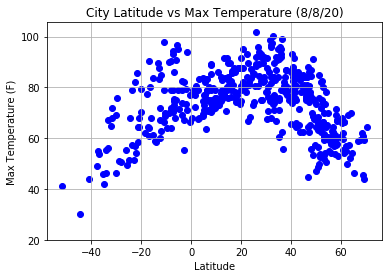

In [20]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["latitude"], city_data_pd["max_temp"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature " + '(8/8/20)')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(20, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig('output_data/LatitudeTemp.png')

# Show plot
plt.show()



## Latitude vs. Humidity Plot

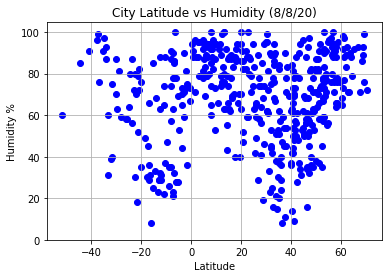

In [21]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["latitude"], city_data_pd["humidity"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Latitude vs Humidity " + '(8/8/20)')
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig('output_data/LatitudeHumidity.png')

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

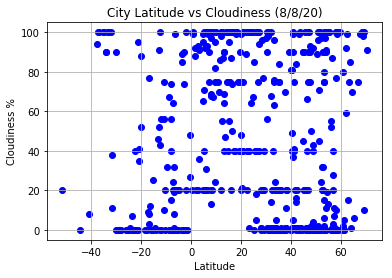

In [22]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["latitude"], city_data_pd["cloudiness"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness " + '(8/8/20)')
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig('output_data/LatitudeCloudiness.png')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

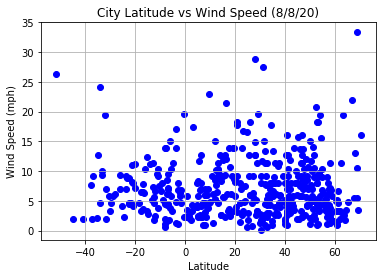

In [25]:
# Build a scatter plot for each data type
plt.scatter(city_data_pd["latitude"], city_data_pd["wind_speed"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed " + '(8/8/20)')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 40, 5))
plt.grid(True)

# # Save the figure
plt.savefig('output_data/LatitudeWindSpeed.png')

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["latitude"]).astype(float) > 0, :]
southern_df = city_data_pd.loc[pd.to_numeric(city_data_pd["latitude"]).astype(float) < 0, :]

In [27]:
northern_df.head()

,city,country,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,date
0,topchikha,ru,52.82,83.12,64.40,77.0,0,4.47,1596917642
1,chaiyaphum,th,15.75,102.00,76.05,89.0,87,5.64,1596917642
2,tinskoy,ru,56.15,96.92,59.90,76.0,52,4.23,1596917643
3,diest,be,50.98,5.05,84.99,37.0,45,6.93,1596917643
4,bin qirdan,tn,33.14,11.22,77.16,68.0,0,6.02,1596917643


In [28]:
southern_df.head()

,city,country,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,date
5,tabora,tz,-5.02,32.80,71.60,53.0,20,11.41,1596917643
6,casino,au,-28.87,153.05,51.01,81.0,0,5.82,1596917643
10,chimore,bo,-16.98,-65.13,90.57,29.0,77,3.71,1596917643
13,poum,nc,-20.23,164.02,70.32,76.0,52,11.23,1596917643
14,santa fe,ar,-31.63,-60.70,68.00,75.0,11,1.99,1596917470


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.33x + 86.61


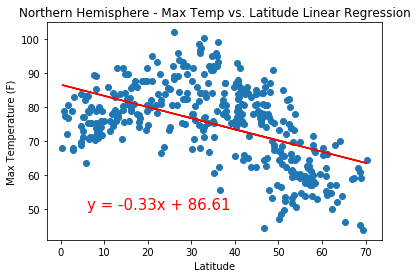

In [42]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['max_temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,50),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.savefig('output_data/NHTempLat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.8x + 82.56


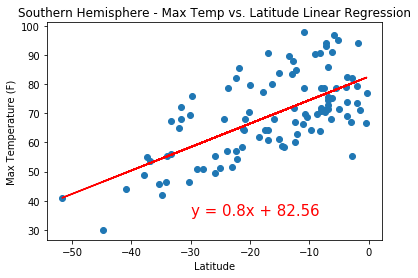

In [43]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['max_temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.savefig('output_data/SHTempLat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 76.13


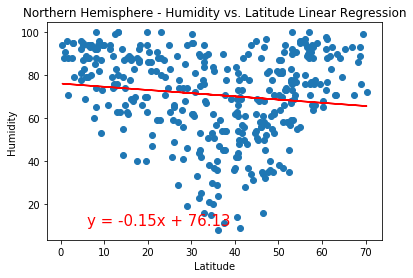

In [44]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

plt.savefig('output_data/NHHumLat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.41x + 53.44


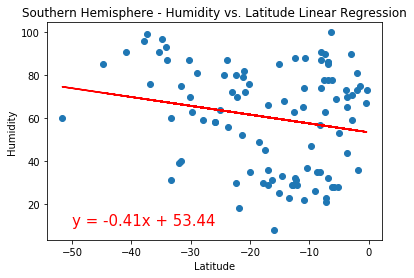

In [45]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

plt.savefig('output_data/SHHumLat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.62x + 69.95


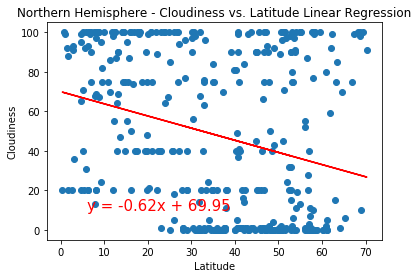

In [51]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

plt.savefig('output_data/NHCloudLat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.54x + 24.61


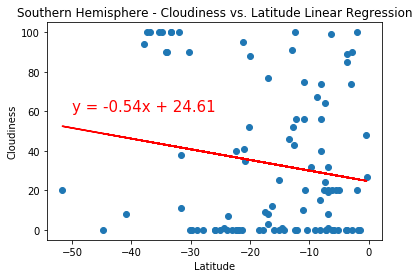

In [56]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

plt.savefig('output_data/SHCloudLat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 6.73


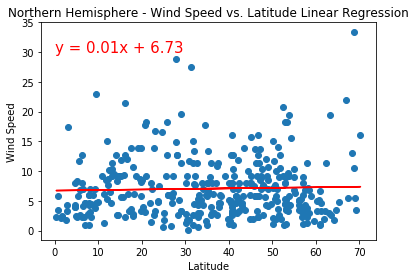

In [57]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['wind_speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

plt.savefig('output_data/NHWindLat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 6.23


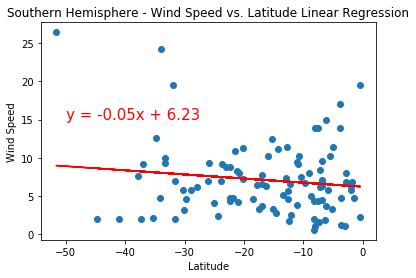

In [60]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['wind_speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

plt.savefig('output_data/SHWindLat.png')
plt.show()